# Machine Learning Project: Churn Prediction for an Internet and Telephone Provider

This Jupyter notebook presents a comprehensive machine learning project focused on designing an accurate churn prediction model for an internet and telephone provider.

## Project Objectives

- Develop a machine learning model to predict customer churn, helping the provider identify customers at risk of leaving.
- Conduct exploratory data analysis (EDA) to gain insights into the churn data and understand key patterns and trends.
- Perform feature engineering to create meaningful and predictive features from the available dataset.
- Evaluate multiple models using appropriate evaluation metrics to identify the most effective algorithm for churn prediction.
- Fine-tune the chosen model through hyperparameter tuning to optimize its performance.
- Deploy the finalized model in a production environment for real-time churn prediction.

## Project Phases

1. **Exploratory Data Analysis (EDA):** Explore and visualize the churn data to gain a deep understanding of its characteristics, uncover important relationships, and identify potential challenges or biases.

2. **Feature Engineering:** Transform and enhance the dataset by creating new features, encoding categorical variables, handling missing values, and scaling numerical features. This step aims to maximize the predictive power of the model.

3. **Model Evaluation and Selection:** Train and evaluate different machine learning models using appropriate metrics such as accuracy, precision, recall, and F1-score. Compare their performance to select the most suitable model for churn prediction.

4. **Hyperparameter Tuning:** Fine-tune the chosen model by optimizing its hyperparameters using techniques like grid search or randomized search. This step aims to further improve the model's predictive performance.

5. **Model Deployment:** Integrate the finalized model into the provider's infrastructure for real-time predictions. This involves creating an API or web service that enables the provider to make accurate churn predictions on new customer data.

## Conclusion

By the end of this project, we will have developed a robust churn prediction model that empowers the internet and telephone provider to proactively address customer churn. The insights gained from the project will contribute to improved customer retention and ultimately drive business growth.

Let's embark on this exciting machine learning journey and build an exceptional churn prediction model!


## SECTION : Exploratory Data Analysis

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  


In [2]:
# Read the churn data 
df = pd.read_csv(filepath_or_buffer='Telco-Customer-Churn.csv')

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Clearly no data is missing and customer ID is irrelevent. There are lot of of categorical features.

In [6]:
#Drop customer id 
df = df.drop(columns='customerID')

<Axes: xlabel='Churn', ylabel='count'>

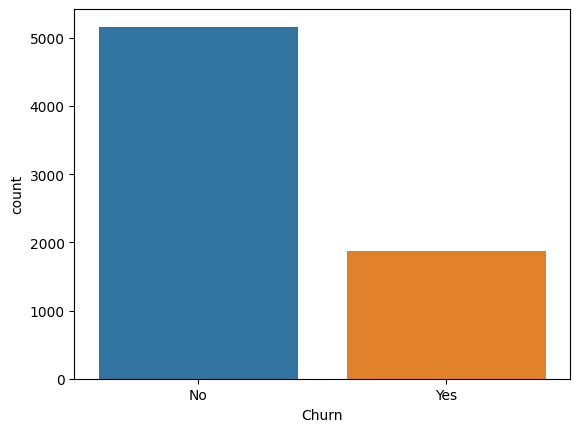

In [7]:
# Let's see if our feature is balance or not
sns.countplot(data=df, x='Churn' , hue='Churn')

So, the churn count is lower. The dataset is unblanced over the class. Might need to set weights to balance in ML algorithm 

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

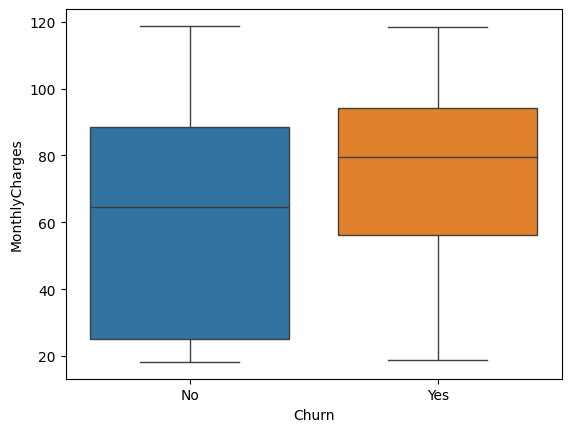

In [8]:
# Let's see the relationship between monthly charge and churn rate
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn')

Ohh there it is. Who wants to pay more money? Clearly, there is good relationship between monthly charge and churn rate.

Let's see if Internet Service Type has an impact.

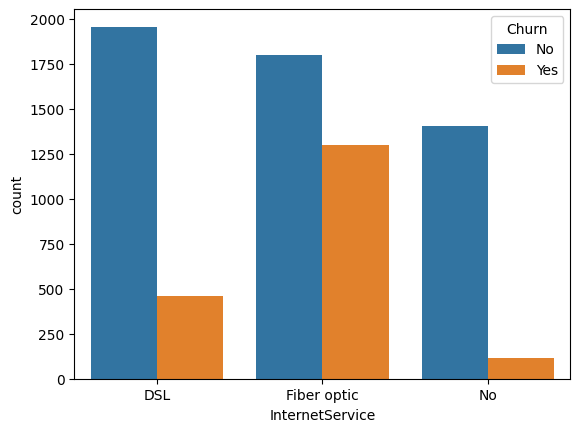

In [9]:
sns.countplot(data=df, x='InternetService', hue='Churn');

Churn rate is clearly high for Fiber optics Internet Service. How is the TechSupport there ?

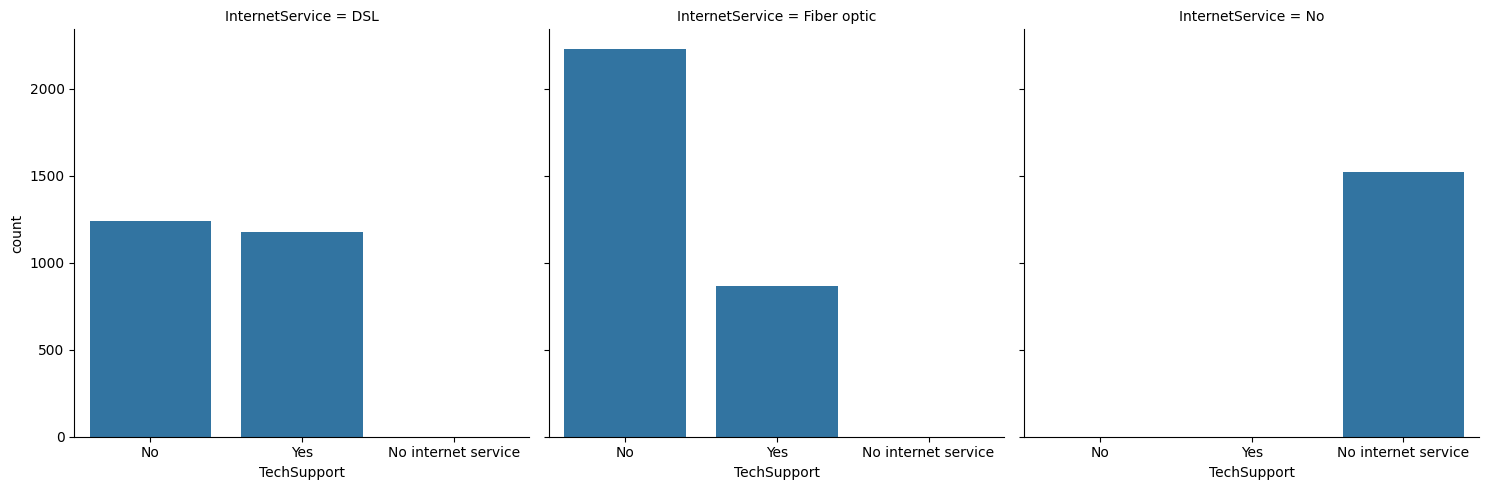

In [10]:
sns.catplot(data=df, x='TechSupport', col='InternetService', kind='count');

Clearly, there are more subscriber and comparably less tech support for fiber optics. Need to fund the tech support for this department according to data.

Let's see the relationship between contarct and churn rates.

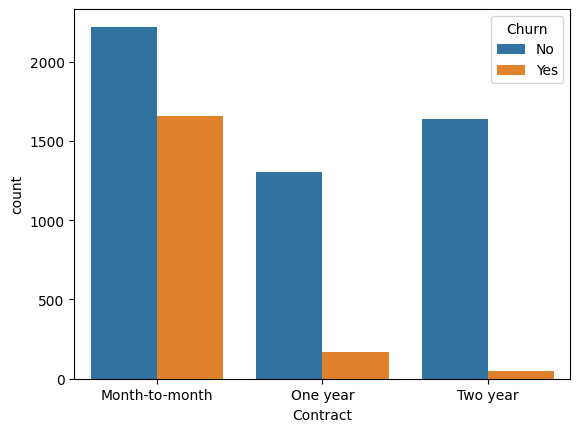

In [11]:
sns.countplot(data=df, x='Contract', hue='Churn');

Clearly, churn rates are higher in month-to-month cotract. Marketing should focus on long term contract instead of month-to-month subscription.

Let's see if the tenure of a customer has an impact on churn rate.

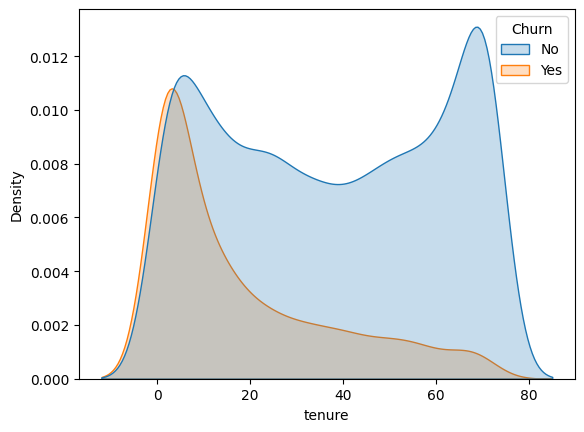

In [12]:
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True);

Clearly, the churn rate is higher for customers with lower tenure. This indicates that newer customers are more likely to churn. The company should focus on retaining these customers by providing better services and incentives.

Let's see if the patner status has an impact on churn rate.

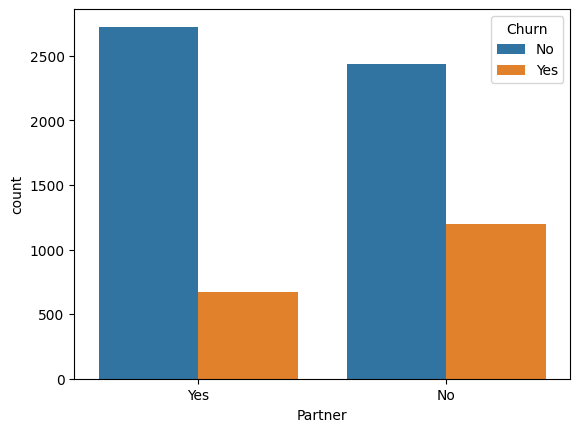

In [13]:
sns.countplot(data=df, x='Partner', hue='Churn');

Clearly, churn rate is higher in non patners customers as expected.

Is security a reason for churn rates? Let's see

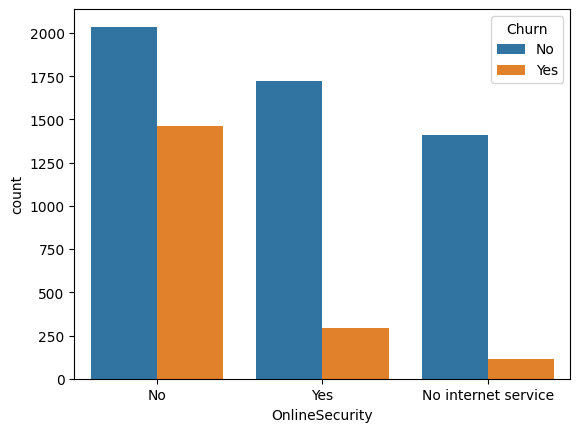

In [14]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn');

Clearly, security also has some relationship with churn rate.

Should we push for phone service for customer retentation ? 

<Axes: xlabel='MultipleLines', ylabel='count'>

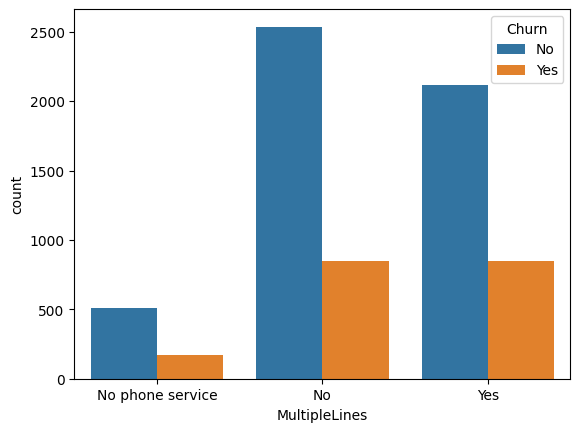

In [15]:
sns.countplot(data=df, x='MultipleLines', hue='Churn')

No clear indication! Probably not the reson for churn rate.

# Section: Feature Engineering

Let's one hot encode these categorical data!

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Let's seprate feature and lables.

In [17]:
df = pd.get_dummies(df, drop_first=True)

Let's see the correlation of different features with the churn rate.

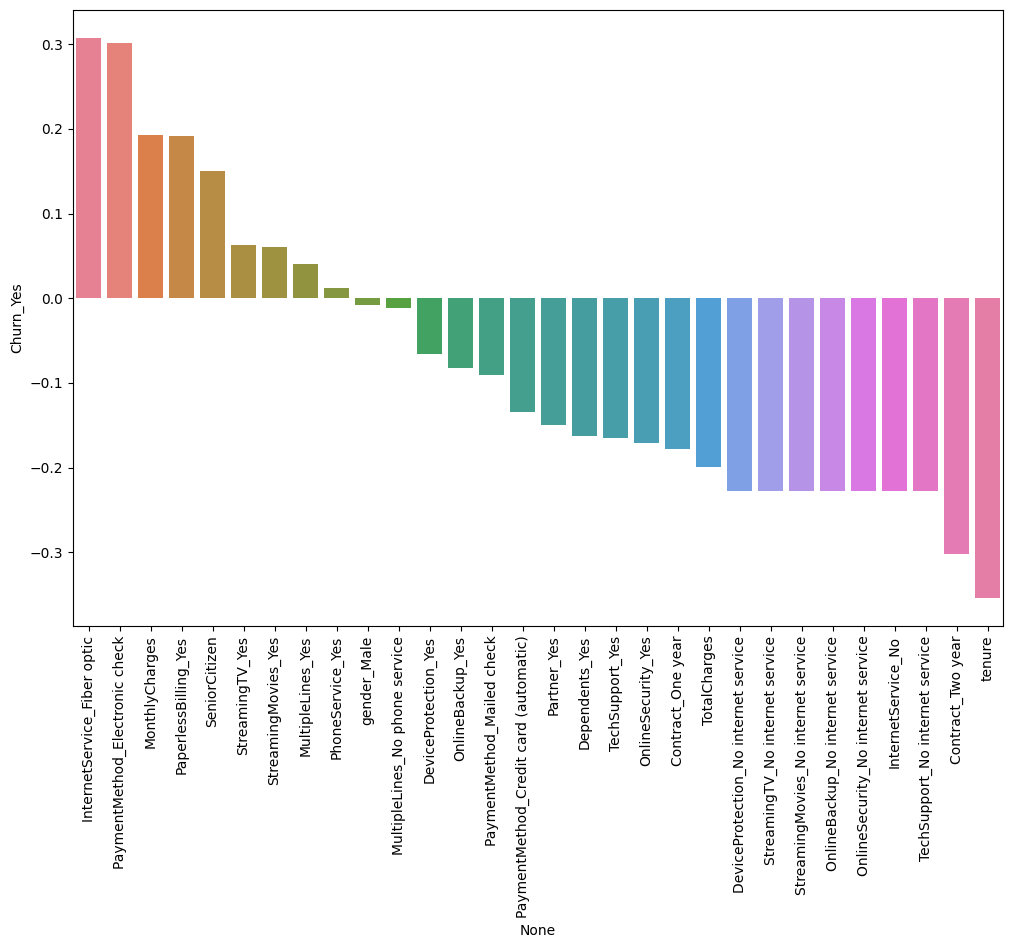

In [18]:

plt.figure(figsize=(12,8))
correlation = df.corr()['Churn_Yes'].sort_values(ascending=False)[1:]
sns.barplot(x=correlation.index, y=correlation, hue=correlation.index)
plt.xticks(rotation=90);

We can see from above that internet service type, tenure, contract type are main players in churn rate.

In [19]:
# Features and Lables 
X = df.drop(columns='Churn_Yes')
y = df['Churn_Yes']

In [20]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [21]:
y.head()

0    False
1    False
2     True
3    False
4     True
Name: Churn_Yes, dtype: bool

Let's do some train test splits and feature scaling with the data.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Section: Model Selection and Evaluation 

## Potential Classifiers
We will test the following classifiers for churn prediction:
1. **Logistic Regression** 
2. **KNearest Neighbours**
3. **Support Vector Machines**
4. **Random Forest Classifiers**
5. **Boosted Classifiers**
6. **Bagged Classifiers**

Might need to do a grid search for hyperparameter tuning. Let's build some pipelines for potential candidates.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Let's start with default parameters to see baseline performance 

pipe_log = make_pipeline(StandardScaler(), LogisticRegression( class_weight='balanced', random_state=101))
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced', random_state=101))
pipe_erf = make_pipeline(StandardScaler(), ExtraTreesClassifier(class_weight='balanced', random_state=101))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_svc = make_pipeline(StandardScaler(), SVC(class_weight='balanced', random_state=101, probability=True))
pipe_gbc  = make_pipeline(StandardScaler() ,GradientBoostingClassifier(random_state=101))
pipe_ada = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=101, algorithm='SAMME'))
# List of pipes 
pipes = [pipe_log, pipe_rf, pipe_erf ,pipe_knn, pipe_svc, pipe_gbc, pipe_ada]

In [24]:
# Let's see the cross val score of these model on the traning set
from sklearn.model_selection import cross_val_score

scores = []
for model in pipes:
    scores.append(cross_val_score(model , X_train , y_train,n_jobs=-1, cv=10 , scoring='accuracy').mean())

Let's see the baseline crossvalidation performace without hyperparameter tuning!

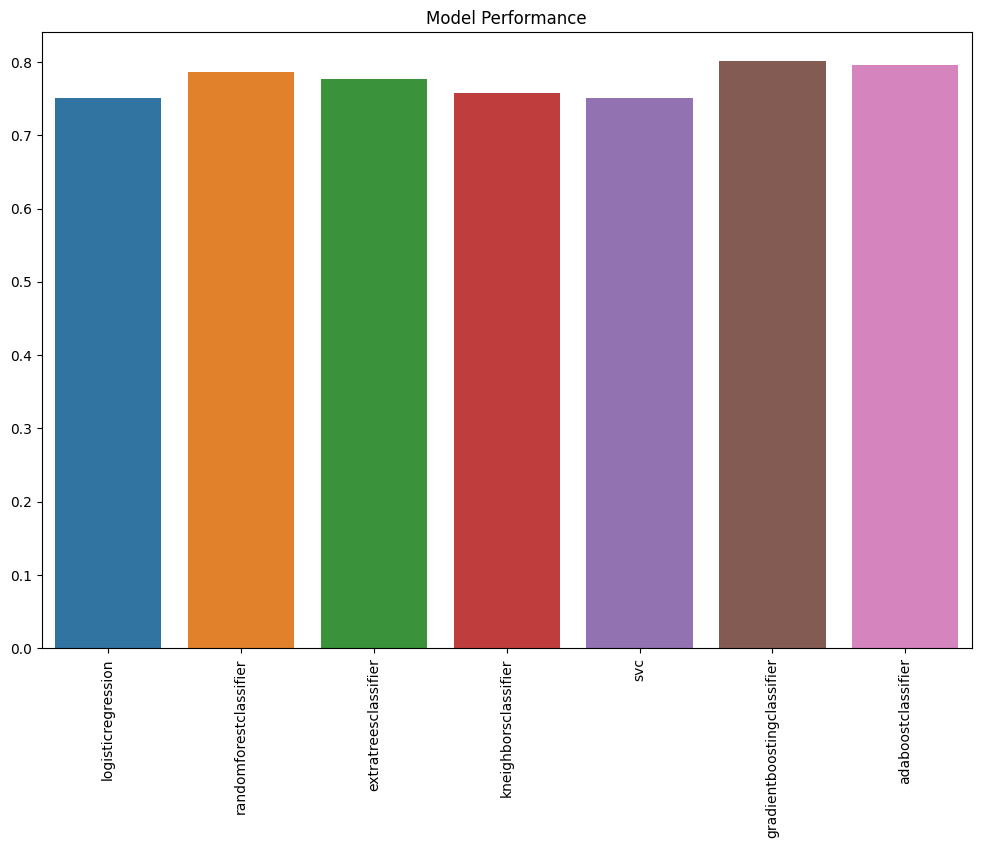

In [46]:
import matplotlib.pyplot as plt

fig_perf , ax = plt.subplots(figsize=(12,8))

sns.barplot(x=[list(pipe.named_steps.keys())[1] for pipe in pipes], y=scores, hue=[list(pipe.named_steps.keys())[1] for pipe in pipes], ax=ax)
plt.xticks(rotation = 90);

# Title of the plot
plt.title('Model Performance')
# Save the plot
plt.savefig('model_performance.png')

They all have similar performance but trees seems to have a edge over others. 

# Section: Hyperparameter Tuning  

Let's do a grid search for best hyperparameter for RandomForest,GradientBoosted Trees,SVC and KNN!

In [26]:
from sklearn.model_selection import GridSearchCV

hyper_parms_rf = {'randomforestclassifier__max_depth' : [None , *np.arange(3,10)],'randomforestclassifier__n_estimators' : np.arange(64,128) ,'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_features' :['sqrt', 'log2']}
hyper_parms_gbc = {'gradientboostingclassifier__learning_rate': np.linspace(0.1, 1, 10) ,'gradientboostingclassifier__n_estimators' : np.arange(64,128)}
# hyper_parms_svc = {'svc__kernel': ['rbf', 'linear', 'poly'], 'svc__gamma': ['scale', 'auto'], 'svc__degree': [2,3], 'svc__C': np.logspace(-4,4,11)}
hyper_parm_knn = {'kneighborsclassifier__n_neighbors': np.arange(3,21)}

In [27]:
grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=hyper_parms_rf, cv=5, n_jobs=-1, scoring=['accuracy', 'f1'], refit='accuracy', pre_dispatch='n_jobs')
grid_gbc = GridSearchCV(estimator=pipe_gbc, param_grid=hyper_parms_gbc, cv=5, n_jobs=-1, scoring=['accuracy', 'f1'], refit='accuracy', pre_dispatch='n_jobs')
# grid_svc = GridSearchCV(estimator=pipe_svc, param_grid=hyper_parms_svc,  scoring=['accuracy', 'f1'], refit='accuracy', pre_dispatch='n_jobs', cv=5, n_jobs=-1)
grid_knn = GridSearchCV(estimator=pipe_knn, param_grid=hyper_parm_knn,  scoring=['accuracy', 'f1'], refit='accuracy', pre_dispatch='n_jobs', cv=5, n_jobs=-1)

In [28]:
# Perform the grid search
grid_rf.fit(X_train, y_train)
grid_gbc.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

/home/hades/miniconda3/envs/navigator/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])},
             pre_dispatch='n_jobs', refit='accuracy',
             scoring=['accuracy', 'f1'])

In [29]:
regularized_estimators = [grid_rf,grid_gbc,grid_knn]
estimators_name = [list(estimators.best_estimator_.named_steps.keys())[1] for estimators in regularized_estimators]

The grid are trained and optimized. Let's see the performance on the test set of the individual estimators.

In [30]:
from sklearn.metrics import accuracy_score
accuracy_list = []

for estimators in regularized_estimators:
    accuracy_list.append(accuracy_score(y_test, estimators.predict(X_test)))
    print(f'{list(estimators.best_estimator_.named_steps.keys())[1]} has a accuracy of {np.round(accuracy_list[-1], decimals=3)}') 

randomforestclassifier has a accuracy of 0.791
gradientboostingclassifier has a accuracy of 0.803
kneighborsclassifier has a accuracy of 0.789


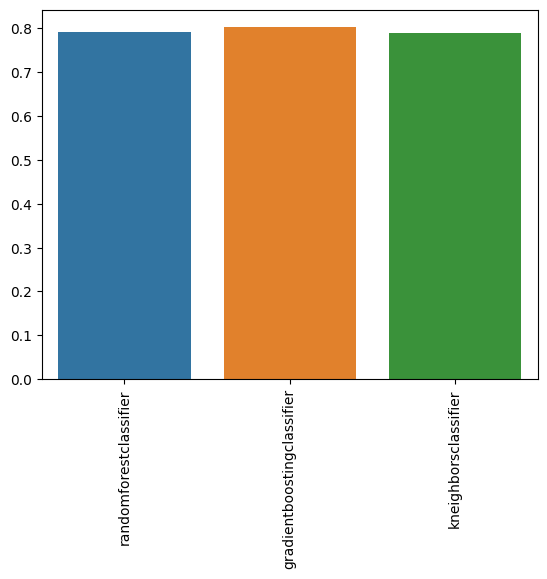

In [37]:
sns.barplot(x= estimators_name, y = accuracy_list, hue=estimators_name)
plt.xticks(rotation=90);

We see that all of them perform similary in the test data. Since these are different algorathims, we can use voting meta learner to combine all of these classifies to get a consistent predictions.

# SECTION: Deployment of the model

Let's create a meta learner and deploy the model.

In [40]:
meta_estimators_list = [pipe_log, grid_rf.best_estimator_, pipe_erf ,grid_knn.best_estimator_, grid_gbc.best_estimator_, pipe_ada]
meta_estimators_names = [list(pipe.named_steps.keys())[1] for pipe in meta_estimators_list]

In [41]:
from sklearn.ensemble import VotingClassifier

meta_estimator = VotingClassifier(list(zip(meta_estimators_names, meta_estimators_list)), voting='hard', n_jobs=-1)

meta_estimator.fit(X_train, y_train)

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(class_weight='balanced',
                                                                  random_state=101))])),
                             ('randomforestclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      n_estimat...
                             ('gradientboostingclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier(learning_rate=0.2,
                                                                          n_estimators=66,
                                                                          random_state=101))])),
                             ('adaboostclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('adaboostclassifier',
                                               AdaBoostClassifier(algorithm='SAMME',
                                                                  random_state=101))]))],
                 n_jobs=-1)

We have trained our meta learner and now we can check the accuracy and retrain and deploy!

              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1580
        True       0.64      0.49      0.56       530

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



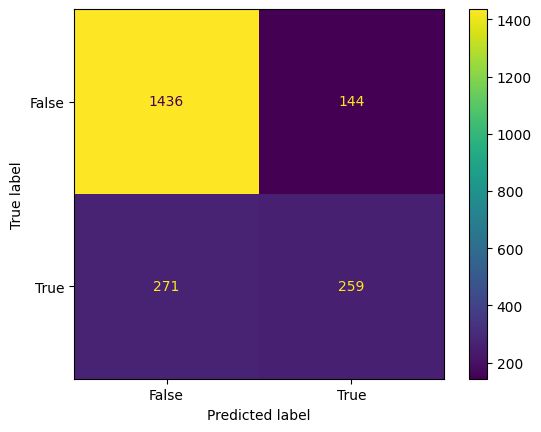

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, meta_estimator.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix=None).from_estimator(meta_estimator, X_test, y_test)
# Save the plot
plt.savefig('confusion_matrix.png')

Okay, let's retrain and deploy 

In [43]:
meta_estimator.fit(X, y)
# from joblib import dump
# dump(value=meta_estimator, filename='final_model')

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(class_weight='balanced',
                                                                  random_state=101))])),
                             ('randomforestclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      n_estimat...
                             ('gradientboostingclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier(learning_rate=0.2,
                                                                          n_estimators=66,
                                                                          random_state=101))])),
                             ('adaboostclassifier',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('adaboostclassifier',
                                               AdaBoostClassifier(algorithm='SAMME',
                                                                  random_state=101))]))],
                 n_jobs=-1)

Let's see the feature importance!

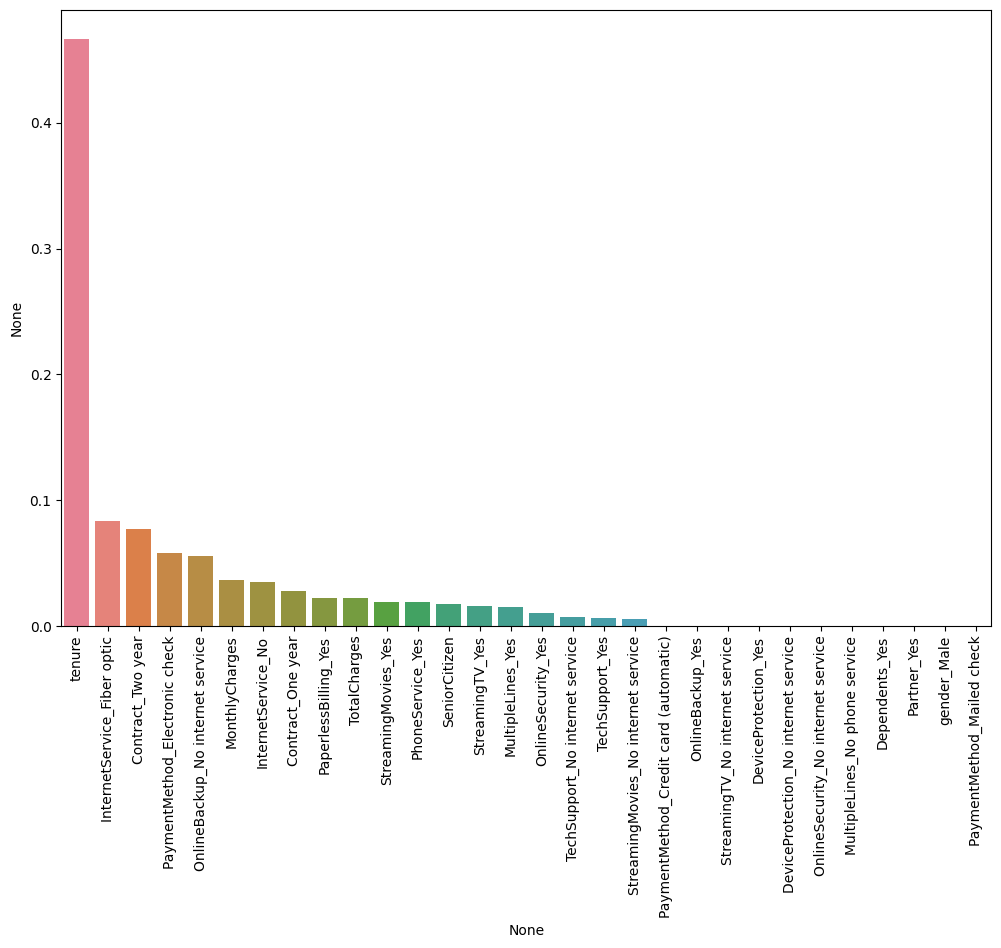

In [47]:
import matplotlib.pyplot as plt

feature_importance_fig, ax = plt.subplots(figsize=(12,8))
# Sort the feature importance
feature_importance = pd.Series(meta_estimator.estimators_[-1]['adaboostclassifier'].feature_importances_, index=meta_estimator.feature_names_in_).sort_values(ascending=False)
sns.barplot(x=feature_importance.index, y=feature_importance, hue=feature_importance.index, ax=ax)
# sns.barplot(x=meta_estimator.feature_names_in_, y =meta_estimator.estimators_[-1]['adaboostclassifier'].feature_importances_ , hue=meta_estimator.feature_names_in_, ax=ax)
plt.xticks(rotation=90);

# Save the plot
plt.savefig('feature_importance.png')